### 0. Import libraries and load data

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.set()

TRAIN_VALIDATION_RESULTS_PATH = "../data/predictions/train_validation/"
TEST_VALIDATION_PATH = "../data/predictions/test/"
STORAGE_PATH = "../results/"
NUM_FOLLOWERS_PATH = "../data/num_followers.csv"
COLUMN_NAMES = ["pid", "num_followers", "prediction", "baseline_prediction"]

In [2]:
train_validation_results = pd.read_csv(
    TRAIN_VALIDATION_RESULTS_PATH + os.listdir(TRAIN_VALIDATION_RESULTS_PATH)[0],
    header=None,
    names=COLUMN_NAMES,
).sort_values("num_followers")

test_results = pd.read_csv(
    TEST_VALIDATION_PATH + os.listdir(TEST_VALIDATION_PATH)[0],
    header=None,
    names=COLUMN_NAMES,
).sort_values("num_followers")


### 1. Plot predictions vs ground truth

Text(0.5, 1.0, 'Train-validation set')

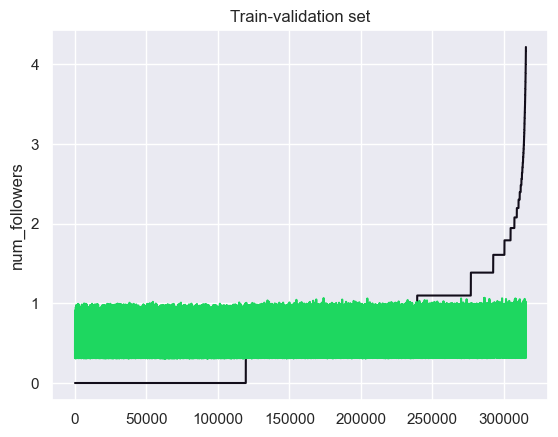

In [3]:
sns.lineplot(x=range(train_validation_results.shape[0]), y=train_validation_results["num_followers"], color="#120D1A")
sns.lineplot(x=range(train_validation_results.shape[0]), y=train_validation_results["prediction"], color="#1ED760")
plt.title("Train-validation set")

Text(0.5, 1.0, 'Test set')

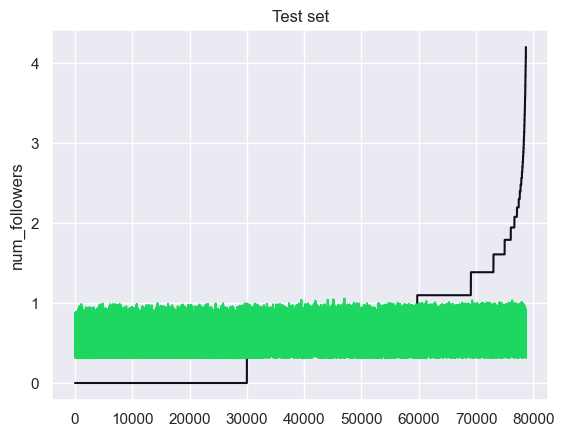

In [4]:
sns.lineplot(x=range(test_results.shape[0]), y=test_results["num_followers"], color="#120D1A")
sns.lineplot(x=range(test_results.shape[0]), y=test_results["prediction"], color="#1ED760")
plt.title("Test set")

### 1. Plot distribution of the number of followers

<Axes: >

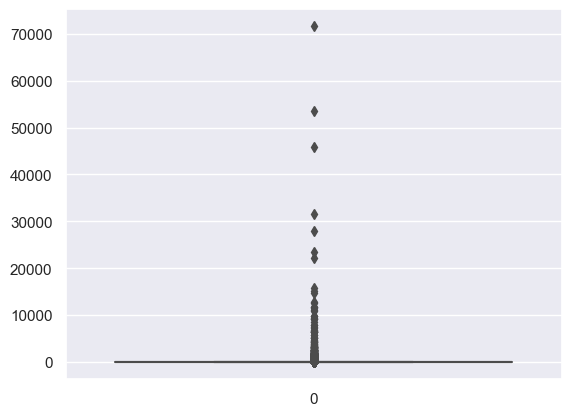

In [5]:
num_followers = np.array(sorted(pd.read_csv(NUM_FOLLOWERS_PATH, header=None)[0].tolist()))
sns.boxplot(num_followers)

### 2. Plot model performance

In [6]:
labels = [
    "original data",
    "all techniques",
    "outliers removed",
    "deskewed target",
    "undersampled data",
    "outliers removed +\ndeskewed target",
    "all techniques +\noptimization"
]

train_model_results = [
    -0.03160181433964163,
    0.058816651329797555,
    0.017539690630633875,
    0.03933231504785717,
    -0.020233600153090947,
    0.043926264806167716,
    0.05997417909286529
]
test_model_results = [
    -0.006442343229309477,
    0.0580762783905826,
    0.018405495740191347,
    0.03699281820294731,
    -0.01224562480409852,
    0.043613671158115874,
    0.06068011444878496
]


In [7]:
test_results = pd.DataFrame(
    {"cross-validation": train_model_results, "test": test_model_results}
).melt()
test_results["labels"] = labels * 2
test_results.rename(
    {
        "variable": "measurement type",
        "value": "Coefficient of determination",
        "labels": "experiment type",
    },
    axis=1,
    inplace=True,
)


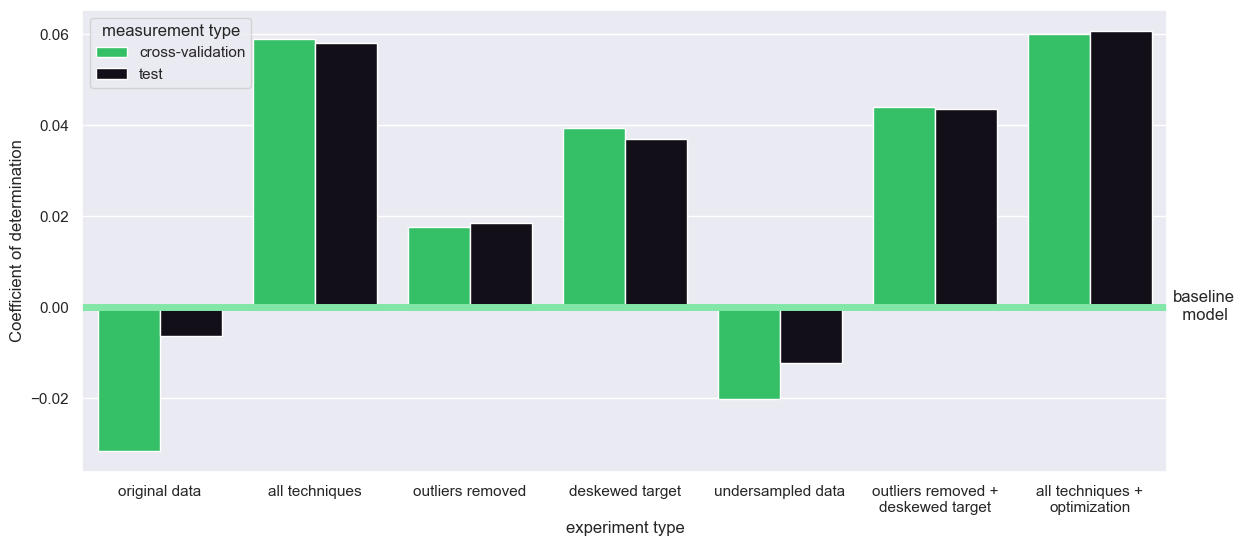

In [8]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14, 6)
sns.barplot(
    data=test_results,
    x="experiment type",
    y="Coefficient of determination",
    hue="measurement type",
    palette=["#1ED760", "#120D1A"],
    ax=ax
)

plt.text(1.005, 0.33, 'baseline\n  model', transform = ax.transAxes)
plt.axhline(0, linewidth=5, color="#82E6A6")


plt.savefig(STORAGE_PATH + "model_metrics.png", dpi=300, bbox_inches="tight")


### 3. Plot feature importance

In [9]:
feature_importance_all_techniques = {
    "acousticness": 0.0007571308908343522,
    "danceability": 0.03062966033584552,
    "duration_ms": 0.0035775191374029314,
    "energy": 0.004567156164646529,
    "instrumentalness": 0.013996262205825238,
    "key": 0.00030724351401284836,
    "liveness": 0.0008214262984746453,
    "loudness": 0.003128874786113335,
    "mode": 0.002825093507861581,
    "speechiness": 0.0012990842992958833,
    "tempo": 0.0018991802034472845,
    "valence": 0.032446929658785165,
    "num_tracks": 0.06953476821913325,
    "num_artists": 0.019794779049240558,
    "num_albums": 0.8110697651149328,
    "genre_count": 0.0033451266141478735,
}
feature_importance_wo_outliers = {
    "acousticness": 0.0037937888991971687,
    "danceability": 0.03380967476202414,
    "duration_ms": 0.0071627478739023955,
    "energy": 0.019667227631242398,
    "instrumentalness": 0.02232528233745878,
    "key": 0.0036140665555530888,
    "liveness": 0.0044477631058798695,
    "loudness": 0.00720661690850637,
    "mode": 0.01281147944337372,
    "speechiness": 0.009787948291082147,
    "tempo": 0.003565732569310541,
    "valence": 0.04174366249304896,
    "num_tracks": 0.10021138954931445,
    "num_artists": 0.025585186503796466,
    "num_albums": 0.6875910515883179,
    "genre_count": 0.016676381487991644,
}

feature_importance = {}

for feature in feature_importance_all_techniques.keys():
    feature_importance[feature] = [
        feature_importance_all_techniques[feature],
        feature_importance_wo_outliers[feature],
    ]
feature_importance = {
    k: v
    for k, v in sorted(feature_importance.items(), key=lambda x: x[1][0], reverse=True)
}


In [10]:
feature_importance_df = (
    pd.DataFrame(feature_importance)
    .T.reset_index()
    .rename({"index": "feature", 0: "all techniques", 1: "outliers removed"}, axis=1)
)
features = feature_importance_df["feature"].tolist()
feature_importance_df = (
    feature_importance_df[["all techniques", "outliers removed"]]
    .melt()
    .rename({"value": "importance", "variable": "experiment type"}, axis=1)
)
feature_importance_df["feature"] = features * 2
feature_importance_df["feature"] = feature_importance_df["feature"].map(
    lambda x: x.replace("_", " ")
)
feature_importance_df


,experiment type,importance,feature
0,all techniques,0.811070,num albums
1,all techniques,0.069535,num tracks
2,all techniques,0.032447,valence
3,all techniques,0.030630,danceability
4,all techniques,0.019795,num artists
5,all techniques,0.013996,instrumentalness
6,all techniques,0.004567,energy
7,all techniques,0.003578,duration ms
8,all techniques,0.003345,genre count
9,all techniques,0.003129,loudness


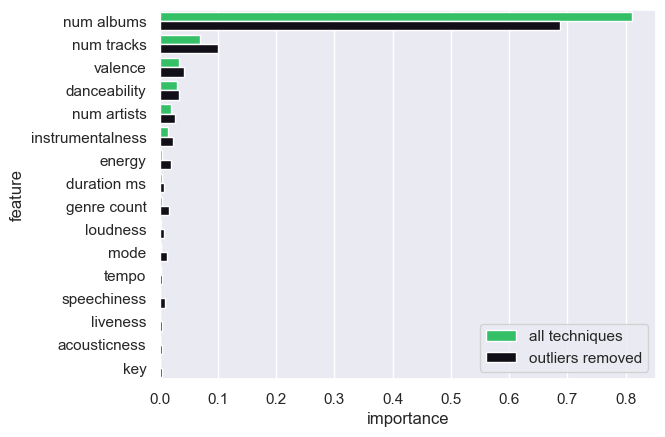

In [11]:
sns.barplot(
    data=feature_importance_df,
    y="feature",
    x="importance",
    hue="experiment type",
    palette=["#1ED760", "#120D1A"],
    width=0.8
)
plt.legend(loc='lower right')
plt.savefig(STORAGE_PATH + "feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()


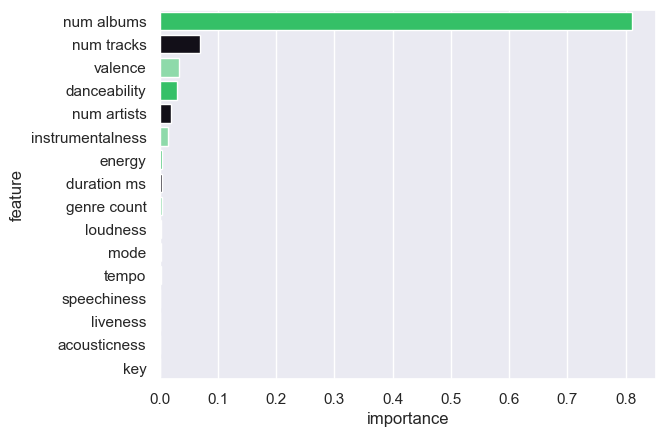

In [12]:
sns.barplot(
    data=feature_importance_df[feature_importance_df["experiment type"] == "all techniques"],
    y="feature",
    x="importance",
    palette=["#1ED760", "#120D1A", "#82E6A6"]
)
plt.savefig(STORAGE_PATH + "feature_importance_best_model.png", dpi=300, bbox_inches="tight")
plt.show()
